<a href="https://colab.research.google.com/github/surajjorwar/FitnessTracker/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd '/content/drive/MyDrive/FitnessTracker/FitnessTracker/data-science-template-main/models'

/content/drive/MyDrive/FitnessTracker/FitnessTracker/data-science-template-main/models


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

Plot settings

In [3]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2


In [11]:
df = pd.read_pickle('/content/drive/MyDrive/FitnessTracker/FitnessTracker/data-science-template-main/data/interim/03_data_features.pkl')

In [12]:
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,71,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,0
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,71,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,0
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,71,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,0
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,71,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,0
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,71,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,0


# Create a training and test set

In [15]:
df_train = df.drop(['participant','category','set'],axis = 1 )

In [20]:
X = df_train.drop('label',axis = 1 )
y = df_train['label']

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 ,random_state = 42 ,stratify=y  )

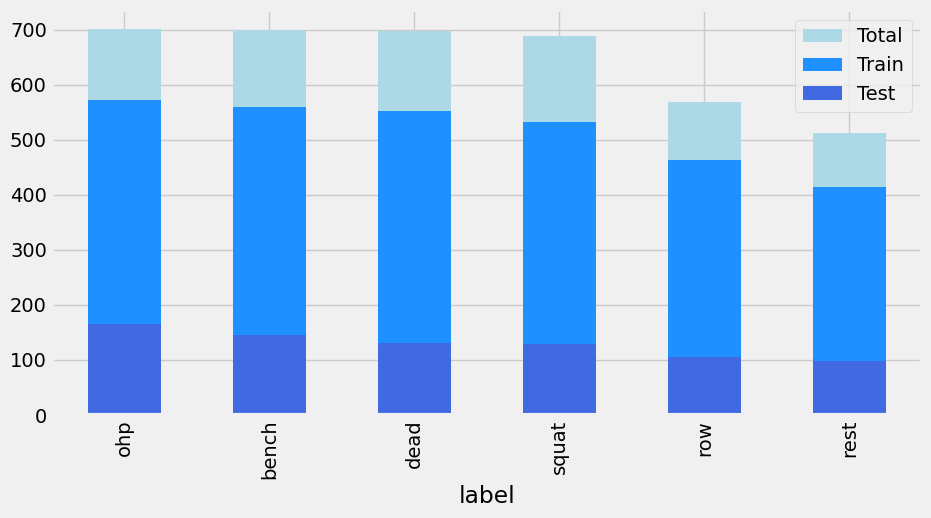

In [23]:
fig , ax = plt.subplots(figsize = (10,5))
df_train['label'].value_counts().plot(
    kind = 'bar' , ax = ax  , color = 'lightblue' , label = 'Total'
)
y_train.value_counts().plot(kind = 'bar',ax= ax , color = 'dodgerblue',label = 'Train')
y_test.value_counts().plot(kind = 'bar',ax= ax , color = 'royalblue',label = 'Test')
plt.legend()
plt.show()


# Split feature subsets

In [38]:
basic_features     = ['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z']
square_features    = ['acc_r','gyr_r']
pca_features       = ['pca_1','pca_2' , 'pca_3']
time_features      = [f for f in df_train.columns if '_temp_' in f ]
freq_features = [f for f in df_train.columns if  ('_freq' in  f ) or ('_pse' in f)]
cluster_features   = ['cluster']

In [39]:
print('basic_features    ', len(basic_features) )
print('square_features   ', len(square_features) )
print('pca_features      ', len(pca_features) )
print('time_features     ', len(time_features) )
print('freq_features', len(freq_features) )
print('cluster_features  ', len(cluster_features) )

basic_features     6
square_features    2
pca_features       3
time_features      16
freq_features 88
cluster_features   1


In [40]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set( basic_features +  square_features +  pca_features ))
feature_set_3 = list(set(feature_set_2 +time_features  ))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features  ))

# Perform forward feature selection using simple decision tree

In [41]:
learner =ClassificationAlgorithms()
max_features = 10
selected_features , ordered_features , ordered_score =  learner.forward_selection(
    max_features, X_train , y_train
)

0
1
2
3
4
5
6
7
8
9


In [46]:
ordered_features

['acc_y_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_y_freq_weighted',
 'gyr_x_freq_1.429_Hz_ws_14',
 'gyr_z_freq_weighted',
 'gyr_y_max_freq',
 'acc_z_freq_2.5_Hz_ws_14',
 'gyr_r_max_freq']

In [47]:
selected_features = ['acc_y_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_y_freq_weighted',
 'gyr_x_freq_1.429_Hz_ws_14',
 'gyr_z_freq_weighted',
 'gyr_y_max_freq',
 'acc_z_freq_2.5_Hz_ws_14',
 'gyr_r_max_freq']

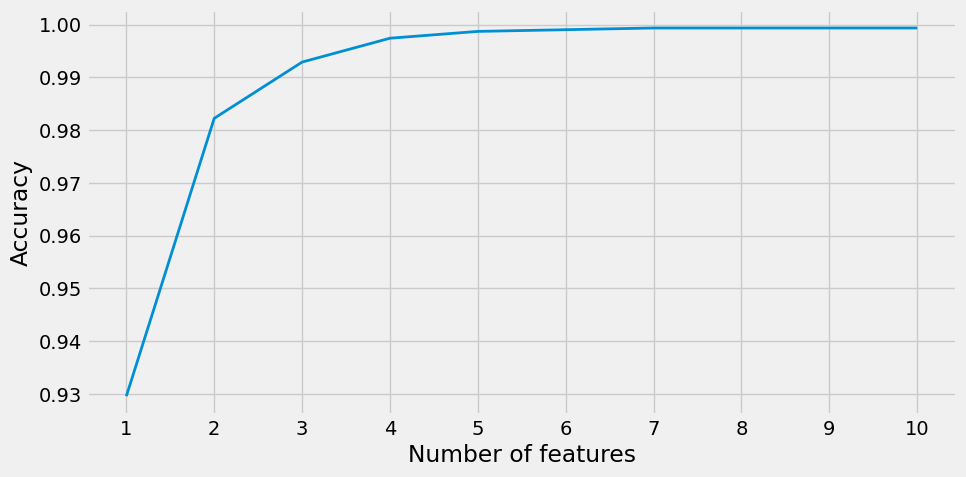

In [48]:
plt.figure(figsize = (10,5))
plt.plot(np.arange(1 , max_features +1 ,1),ordered_score)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,max_features +1,1))
plt.show()

In [42]:
ordered_features

['acc_y_freq_0.0_Hz_ws_14',
 'gyr_r_freq_0.0_Hz_ws_14',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyr_y_freq_weighted',
 'gyr_x_freq_1.429_Hz_ws_14',
 'gyr_z_freq_weighted',
 'gyr_y_max_freq',
 'acc_z_freq_2.5_Hz_ws_14',
 'gyr_r_max_freq']

# Grid search for best hyperparameters and model selection

In [58]:
possible_feature_sets = [
        feature_set_1,
        feature_set_2,
        feature_set_3,
        feature_set_4,
        selected_features
      ]
feature_names =[
'Feature Set 1',
'Feature Set 2',
'Feature Set 3',
'Feature Set 4',
'Selected Features'
]

In [59]:
iterations = 1
score_df = pd.DataFrame()

for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


# Create a grouped bar plot to compare the results

In [60]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.910853
1,RF,Feature Set 1,0.948320
2,KNN,Feature Set 1,0.772610
3,DT,Feature Set 1,0.916021
4,NB,Feature Set 1,0.847545
0,NN,Feature Set 2,0.912145
1,RF,Feature Set 2,0.948320
2,KNN,Feature Set 2,0.768734
3,DT,Feature Set 2,0.922481
4,NB,Feature Set 2,0.847545


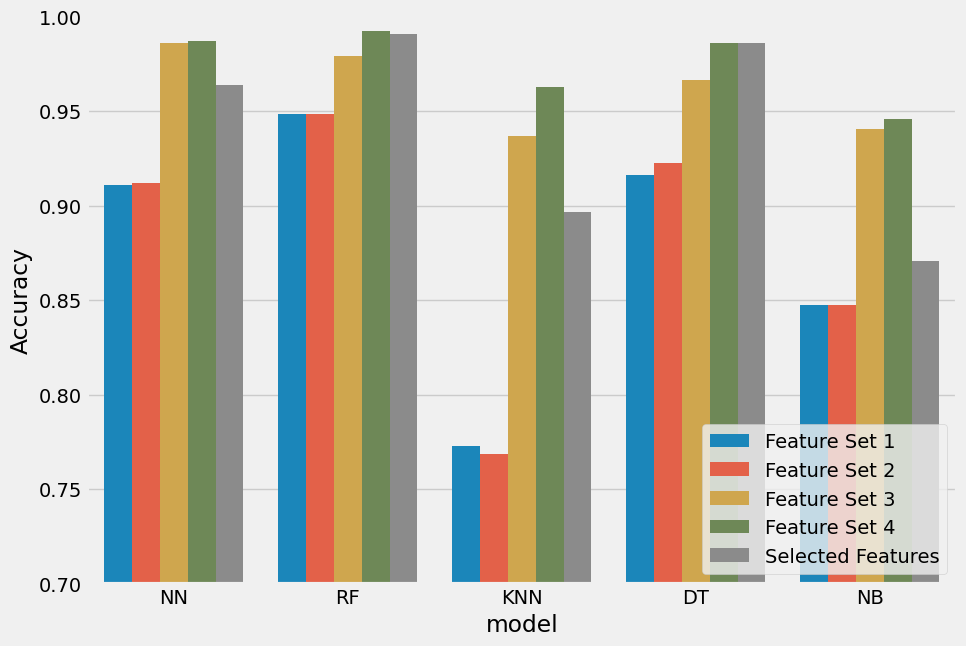

In [63]:
score_df.sort_values(by= 'accuracy', ascending = False)
plt.figure(figsize = (10,7))
sns.barplot(x = 'model',y = 'accuracy',hue = 'feature_set', data = score_df)
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.ylim(0.7,1)
plt.legend(loc = 'lower right')
plt.show()


# Select best model and evaluate results

In [70]:
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
     X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
 )


In [71]:
accuracy = accuracy_score(y_test ,class_test_y)
accuracy

0.9935400516795866

In [72]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y,labels = classes)
cm

array([[143,   0,   3,   0,   0,   0],
       [  0, 130,   0,   0,   0,   0],
       [  1,   0, 165,   0,   0,   0],
       [  0,   0,   0,  98,   0,   0],
       [  0,   1,   0,   0, 104,   0],
       [  0,   0,   0,   0,   0, 129]])

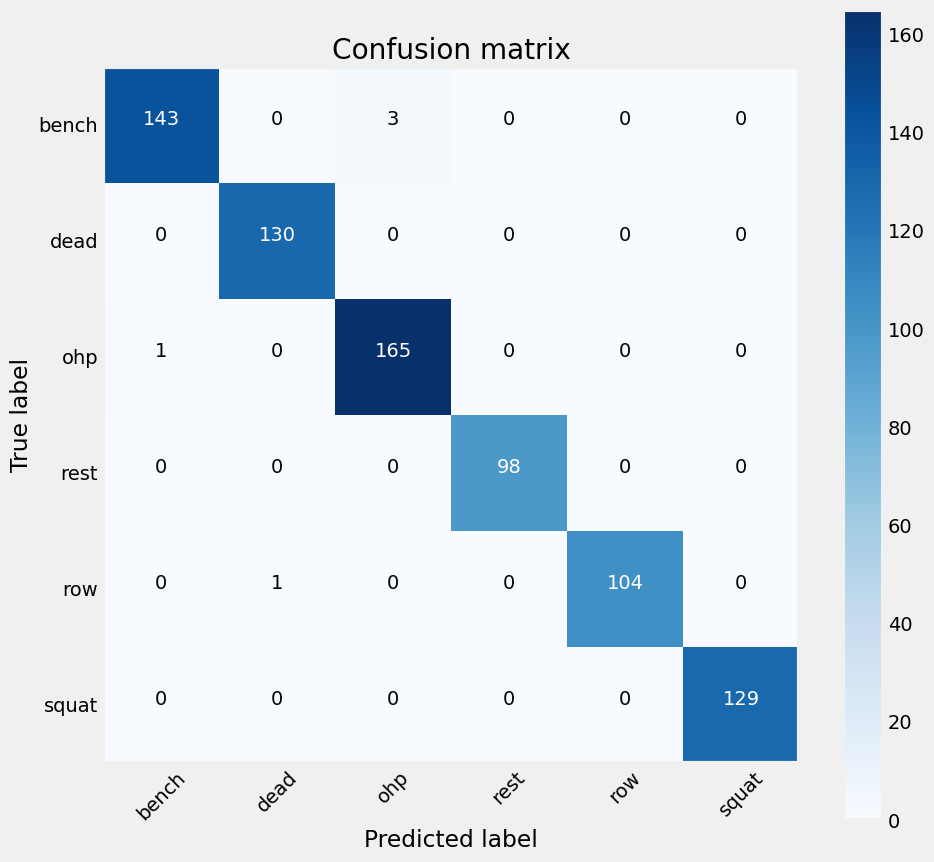

In [73]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [4]:

# --------------------------------------------------------------
# Create a training and test set
# --------------------------------------------------------------


# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------


# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------


# --------------------------------------------------------------
# Grid search for best hyperparameters and model selection
# --------------------------------------------------------------


# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------


# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------


# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------
